# IMPORT LIBS & DATA

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

import os
import pandas as pd
import re
from google.colab import files
from datetime import datetime
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import numpy as np

## Import district_info

In [ ]:
district = pd.read_csv('/content/gdrive/MyDrive/2022/CoderSchool/Final Project/districts_info.csv')
district.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
district.columns = ['dis_id', 'state', 'locale', 'minor', 'lunch', 'hspeed_conn', 'exp_per_stud']
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dis_id        233 non-null    int64 
 1   state         176 non-null    object
 2   locale        176 non-null    object
 3   minor         176 non-null    object
 4   lunch         148 non-null    object
 5   hspeed_conn   162 non-null    object
 6   exp_per_stud  118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [ ]:
district = district[district.state.isna()==False]
district.state.isna().sum()

0

In [ ]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

district['state_id'] = district['state'].replace(us_state_abbrev)
district.head()

,dis_id,state,locale,minor,lunch,hspeed_conn,exp_per_stud,state_id
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",IL
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000[",UT
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000[",WI
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",UT
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000[",NC


In [ ]:
def cate_to_abs(row):
    if None or row == 'nan':
        return None
    elif row == '[0.8, 1[':
        return 9.0
    else:
        return sum(list(map(float,(re.findall('\d+', str(row))))))/2

district['exp_per_stud_abs'] = district['exp_per_stud'].apply(cate_to_abs)
district['minor_abs'] = district.minor.apply(cate_to_abs)
district['lunch_abs'] = district.lunch.apply(cate_to_abs)
district.head()

,dis_id,state,locale,minor,lunch,hspeed_conn,exp_per_stud,state_id,exp_per_stud_abs,minor_abs,lunch_abs
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",IL,15000.00,1.00,1.00
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000[",UT,7000.00,1.00,3.00
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000[",WI,11000.00,1.00,1.00
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",UT,7000.00,1.00,5.00
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000[",NC,9000.00,3.00,3.00


### Fill missing expenditure

In [ ]:
district.loc[district['state'] == 'Connecticut', 'exp_per_stud_abs'] = 20607
district.loc[district['state'] == 'California', 'exp_per_stud_abs'] = 13729
district.loc[district['state'] == 'New Hampshire', 'exp_per_stud_abs'] = 17394
district.loc[district['state'] == 'Ohio', 'exp_per_stud_abs'] = 12699
district.loc[district['state'] == 'North Dakota', 'exp_per_stud_abs'] = 15322
district.loc[district['state'] == 'Arizona', 'exp_per_stud_abs'] = 9341
district.loc[district['state'] == 'New York', 'exp_per_stud_abs'] = 23000

In [ ]:
district['exp_level'] = 'mid'
district.loc[district.exp_per_stud_abs < 10000, 'exp_level'] = 'low' # < 25% exp_per_stud_abs
district.loc[district.exp_per_stud_abs >= 18000, 'exp_level'] = 'high' # >= 75% exp_per_stud_abs

### Create minority level

In [ ]:
def minor(row):
    if row == '[0, 0.2[':
        return 'low'
    else:
        return 'high'

district['minor_level'] = district.minor.apply(minor)
district.head()

,dis_id,state,locale,minor,lunch,hspeed_conn,exp_per_stud,state_id,exp_per_stud_abs,minor_abs,lunch_abs,exp_level,minor_level
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",IL,15000.00,1.00,1.00,mid,low
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000[",UT,7000.00,1.00,3.00,low,low
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000[",WI,11000.00,1.00,1.00,mid,low
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",UT,7000.00,1.00,5.00,low,low
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000[",NC,9000.00,3.00,3.00,low,high


## Import engagement data

In [ ]:
temp = []

def engagement(id):
    file = '/content/gdrive/MyDrive/2022/CoderSchool/Final Project/Engagement data/' + str(id) + '.csv'
    data = pd.read_csv(file, index_col=None, header=0)
    data['dis_id'] = id
    if data.time.nunique() == 366:
        temp.append(data)

district.dis_id.apply(engagement)
engagement = pd.concat(temp)
engagement = engagement.reset_index(drop=True)
del temp

# engagement.to_csv('engagement.csv', index=False)

In [ ]:
# engagement = pd.read_csv('/Users/thientramvu/Documents/Data/Digital Learning/engagement.csv')
# engagement.head()

In [ ]:
engagement.columns = ['time', 'product_id', 'access', 'engagement', 'dis_id']
engagement['time'] = pd.to_datetime(engagement['time'])

engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14913939 entries, 0 to 14913938
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   time        datetime64[ns]
 1   product_id  float64       
 2   access      float64       
 3   engagement  float64       
 4   dis_id      int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 568.9 MB


### Clean engagement data

In [ ]:
engagement.dropna(subset=['access'], inplace=True)
engagement.loc[engagement.engagement.isna()==True, 'engagement'] = 0
print((engagement.engagement.isna()).sum(), (engagement.access.isna()).sum())

0 0


### Create weekday & Covid phase

In [ ]:
engagement['weekday'] = engagement.time.dt.weekday
engagement = engagement[engagement.weekday <= 4]
engagement.weekday.unique()

array([2, 3, 4, 0, 1])

In [ ]:
engagement['calendar_week'] = engagement.time.dt.isocalendar().week
engagement.calendar_week.unique()

<IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Length: 53, dtype: UInt32

In [ ]:
def covidphase(calendar_week):
    if calendar_week < 10:
        return 0 # before
    elif 10 <= calendar_week <= 25:
        return 1 # hk1
    elif calendar_week > 35:
        return 2 # hk2
    else:
        return -1 # summer
        
engagement['Covid_phase'] = engagement.calendar_week.apply(covidphase)
engagement['Covid_phase'].value_counts()

 2    5002550
 1    3761588
 0    1888592
-1    1503371
Name: Covid_phase, dtype: int64

## Import no_internet & no_computer data

In [ ]:
# no connection & device by state
broadband_raw = pd.read_csv('/content/gdrive/MyDrive/2022/CoderSchool/Final Project/broadband_access.csv')
broadband_access = broadband_raw[['state_abr', 'no_comp', 'no_internet']]
median_broadband = broadband_access.groupby('state_abr').median().reset_index(drop=False)
median_broadband.columns = ['state_id', 'no_comp', 'no_internet']
median_broadband

,state_id,no_comp,no_internet
0,AK,9.90,23.60
1,AL,21.30,32.40
2,AR,21.10,36.10
3,AZ,13.20,23.30
4,CA,10.20,17.75
5,CO,11.40,19.55
6,CT,9.85,14.55
7,DC,10.20,19.70
8,DE,10.10,16.20
9,FL,11.80,21.60


In [ ]:
median_broadband['no_internet_level'] = 'mid'
median_broadband.loc[median_broadband.no_internet < 15.5, 'no_internet_level'] = 'low' # < 25% median_broadband
median_broadband.loc[median_broadband.no_internet >= 23.75, 'no_internet_level'] = 'high' # >= 75% median_broadband
median_broadband

,state_id,no_comp,no_internet,no_internet_level
0,AK,9.90,23.60,mid
1,AL,21.30,32.40,high
2,AR,21.10,36.10,high
3,AZ,13.20,23.30,mid
4,CA,10.20,17.75,mid
5,CO,11.40,19.55,mid
6,CT,9.85,14.55,low
7,DC,10.20,19.70,mid
8,DE,10.10,16.20,mid
9,FL,11.80,21.60,mid


## Import mental health

In [ ]:
mentalhealth = pd.read_csv('/content/gdrive/MyDrive/2022/CoderSchool/Final Project/mentalhealth.csv')
mentalhealth.columns = ['state', 'anxiety', 'depression', 'anxiety_or_depression']
mentalhealth.head()

,state,anxiety,depression,anxiety_or_depression
0,Hawaii,0.21,0.18,0.27
1,Delaware,0.22,0.14,0.24
2,New Jersey,0.22,0.19,0.28
3,North Dakota,0.23,0.19,0.26
4,South Carolina,0.23,0.17,0.27


## Create a view for ALL data

In [ ]:
district = pd.merge(district, mentalhealth, on='state')
district = pd.merge(district, median_broadband, on='state_id')
ALL = pd.merge(district, engagement, on='dis_id')
no_Arzn_ALL = ALL[ALL.state != 'Arizona']
# no_Arzn_ALL.to_csv('no_Arzn_ALL.csv', index=False)

## Import devices access percentage

In [ ]:
devices = pd.read_csv('/content/gdrive/MyDrive/2022/CoderSchool/Final Project/devices.csv').iloc[:4,:]

# Visualization Part 1 - Trâm


In [ ]:
# data = pd.read_csv('/content/gdrive/MyDrive/2022/CoderSchool/Final Project/no_Arzn_ALL.csv')
data = no_Arzn_ALL
train_data = no_Arzn_ALL[['state','dis_id','no_comp','no_internet','lunch_abs','exp_per_stud_abs','anxiety_or_depression','access','engagement']].drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12025646 entries, 0 to 12048587
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   dis_id                 int64         
 1   state                  object        
 2   locale                 object        
 3   minor                  object        
 4   lunch                  object        
 5   hspeed_conn            object        
 6   exp_per_stud           object        
 7   state_id               object        
 8   exp_per_stud_abs       float64       
 9   minor_abs              float64       
 10  lunch_abs              float64       
 11  exp_level              object        
 12  minor_level            object        
 13  anxiety                float64       
 14  depression             float64       
 15  anxiety_or_depression  float64       
 16  no_comp                float64       
 17  no_internet            float64       
 18  no_internet_level   

## Weekly Engagement index comparison by Expenditure level

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


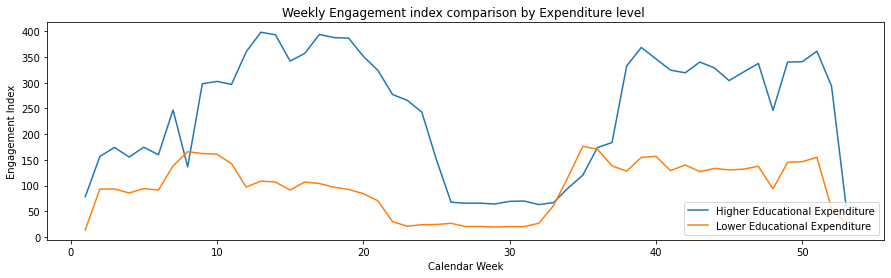

In [ ]:
plot_data = data.groupby(['state','calendar_week'])['engagement','access'].mean().reset_index()
plot_data = plot_data.merge(data[['state','exp_level']].drop_duplicates(), on='state')

plt.figure(figsize=(15,4))
fig = sns.lineplot(
                    data=plot_data[plot_data.exp_level != 'mid'],
                    x='calendar_week',
                    y='engagement',
                    hue='exp_level',
    #                 legend=False,
                    ci=None,
    #                 ax=axs[i]
                    )
#     fig.set_title(level)
#     fig.set_ylim([-0.01,100])
#     fig.set_xlim([-0.01,35])

fig.set(xlabel='Calendar Week', ylabel='Engagement Index')
plt.title('Weekly Engagement index comparison by Expenditure level ')
plt.legend(labels=['Higher Educational Expenditure', 'Lower Educational Expenditure'],
           loc='lower right')
plt.show()

## Weekly Access index comparison by Expenditure level

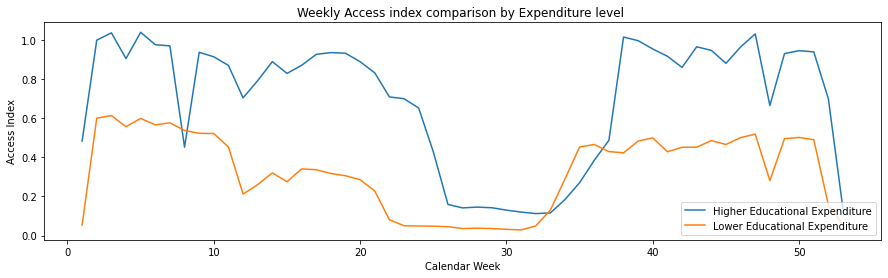

In [ ]:
plt.figure(figsize=(15,4))
fig = sns.lineplot(
                    data=plot_data[plot_data.exp_level != 'mid'],
                    x='calendar_week',
                    y='access',
                    hue='exp_level',
    #                 legend=False,
                    ci=None,
    #                 ax=axs[i]
                    )
#     fig.set_title(level)
#     fig.set_ylim([-0.01,100])
#     fig.set_xlim([-0.01,35])

fig.set(xlabel='Calendar Week', ylabel='Access Index')
plt.title('Weekly Access index comparison by Expenditure level ')
plt.legend(labels=['Higher Educational Expenditure', 'Lower Educational Expenditure'],
           loc='lower right')
plt.show()

## Weekly Access index comparison by Internet availability

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


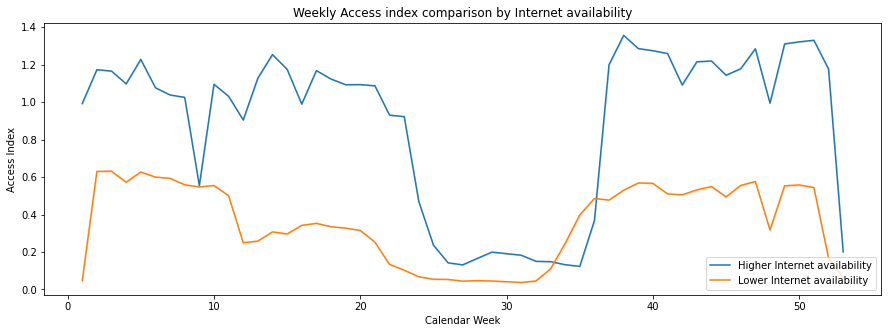

In [ ]:
data['no_internet_level'] = 'mid'
data.loc[data.no_internet < 15.5, 'no_internet_level'] = 'low'
data.loc[data.no_internet >= 23.75, 'no_internet_level'] = 'high'

tmp = data[['state','no_internet_level']].drop_duplicates()
plot_data = plot_data.merge(tmp, on='state')
del tmp

plt.figure(figsize=(15,5))
fig = sns.lineplot(
                    data=plot_data[plot_data.no_internet_level != 'mid'],
                    x='calendar_week',
                    y='access',
                    hue='no_internet_level',
    #                 legend=False,
                    ci=False,
    #                 ax=axs[i]
                    )
#     fig.set_title(level)
#     fig.set_ylim([-0.01,100])
#     fig.set_xlim([-0.01,35])

fig.set(xlabel='Calendar Week', ylabel='Access Index')
plt.title('Weekly Access index comparison by Internet availability')
plt.legend(labels=['Higher Internet availability', 'Lower Internet availability'],
           loc='lower right')
plt.show()

## Overall coor heat map

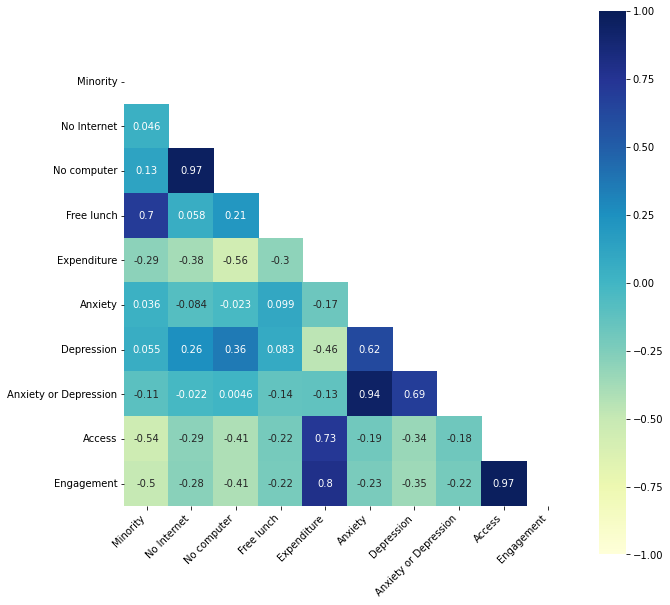

In [ ]:
no_Arzn_ALL_by_state = data.groupby(['state'])[['minor_abs','no_comp','no_internet','lunch_abs','exp_per_stud_abs','anxiety','depression','anxiety_or_depression','access','engagement']].mean().reset_index()

# correlation
pd.set_option('precision', 3)
cor = no_Arzn_ALL_by_state.corr(method='pearson')

# select features that have high absolute correlation with output.
labels = ['Minority', 'No Internet', 'No computer', 'Free lunch', 'Expenditure', 
          'Anxiety', 'Depression', 'Anxiety or Depression', 'Access', 'Engagement']
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0, 
    mask=np.triu(cor),
    cmap='YlGnBu',
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    labels,
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    labels
)
plt.show()

# Visualization Part 2 Nam

## Barplot Students with LIMITED or NO access to internet

Text(0.5, 1.0, 'Students with limited or no internet access')

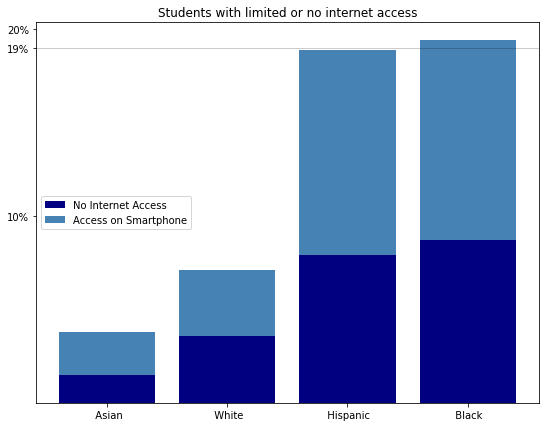

In [ ]:
plt.figure(figsize=(9,7))
plot_data = devices[['Race','No_internet','Smartphone']].sort_values(by='No_internet')
plt.bar(plot_data['Race'], plot_data['No_internet'], color='navy',label="No internet access")
plt.bar(plot_data['Race'], plot_data['Smartphone'], bottom=plot_data['No_internet'], color='steelblue',label="Access on smartphone")
plt.xlabel(None)
plt.xticks(rotation=0)

plt.yticks([10,19,20],['10%', '19%','20%'])
plt.legend(['No Internet Access', 'Access on Smartphone'])

plt.axhline(y=19, linewidth=1, color='black', alpha=0.2)
plt.title('Students with limited or no internet access')


## Barplot Students with LIMITED or NO access to computers

([<matplotlib.axis.YTick at 0x7fd2e4dca490>,
 [Text(0, 0, '10%'), Text(0, 0, '15%'), Text(0, 0, '20%')])

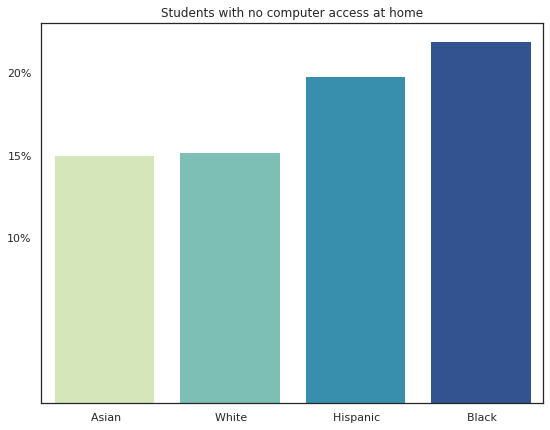

In [ ]:
internet_access = pd.read_csv('/content/gdrive/MyDrive/2022/CoderSchool/Final Project/access.csv').iloc[:4,:]

sns.set(palette='YlGnBu_r')
sns.set_style('white')

plt.figure(figsize=(9,7))
ax = sns.barplot(data=internet_access.sort_values(by='Percent with no access at home'),
            x='Race/ethnicity',
            y='Percent with no access at home',
            palette='YlGnBu')
plt.grid(False)

plt.title('Students with no computer access at home')
plt.xlabel(None)
plt.ylabel(None)

plt.yticks([10,15,20],['10%', '15%','20%'])


## Linear Regression Plot access vs expenditure by ethnicity

In [ ]:
pd.options.display.float_format = '{:.5f}'.format
products_info = pd.read_csv('/content/gdrive/MyDrive/2022/CoderSchool/Final Project/products_info.csv')
products_info.columns = [f"{re.sub(' ', '_', col.lower())}" for col in products_info.columns]

districts_info = pd.read_csv('/content/gdrive/MyDrive/2022/CoderSchool/Final Project/districts_info.csv')
districts_info = districts_info[districts_info['state'].notna()]

districts_reopen_data = pd.read_csv('/content/gdrive/MyDrive/2022/CoderSchool/Final Project/District_Reopen_Data.csv',sep=';')
path = "/content/gdrive/MyDrive/2022/CoderSchool/Final Project/Engagement data"

mental = pd.read_csv('/content/gdrive/MyDrive/2022/CoderSchool/Final Project/raw_test.csv', sep=';')[:52]

devices = pd.read_csv('/content/gdrive/MyDrive/2022/CoderSchool/Final Project/devices.csv').iloc[:4,:]

broadband_raw = pd.read_csv('/content/gdrive/MyDrive/2022/CoderSchool/Final Project/broadband_access.csv')
dir_list = os.listdir(path)
df = pd.DataFrame()

for i in range(0, len(dir_list)):
  # s = path + '/' + dir_list[i]
  df2 = pd.read_csv(path + '/' + dir_list[i])
  df2['time'] = pd.to_datetime(df2['time']) 
  if df2['time'].nunique() >= 366: #check if 366 rows of data is in file, 1 row = 1 day
    df2['district_id'] = re.findall('\d+', dir_list[i])[0]
    df = pd.concat([df, df2[df2['lp_id'].notna()]])

df['lp_id'] = df['lp_id'].astype('int')
df['district_id'] = df['district_id'].astype('int')
df = df.merge(districts_info, how='inner', on='district_id')
df = df.merge(products_info, how='inner', on='lp_id')

df['week']= df['time'].dt.week 
def covidphase(row):
    if row < 10:
        return 0 # before
    elif 10 <= row <= 25:
        return 1 # hk1
    elif row > 35:
        return 2 # hk2
    else:
        return -1 # summer
df['Covid_phase'] = df['week'].apply(covidphase)
df= df[(df['time'].dt.dayofweek <5 )]
def getexpenditure(row):
  if None or row == 'nan':
    return None
  else:
    return sum(list(map(int,(re.findall('\d+', str(row))))))/2
df['Expenditure'] = df.pp_total_raw.apply(getexpenditure)
df.loc[df["state"] == 'Connecticut', 'Expenditure'] = 20607
df.loc[df["state"] == 'California', 'Expenditure'] = 13729
df.loc[df["state"] == 'New Hampshire', 'Expenditure'] = 17394
df.loc[df["state"] == 'Ohio', 'Expenditure'] = 12699
df.loc[df["state"] == 'North Dakota', 'Expenditure'] = 15322
df.loc[df["state"] == 'Arizona', 'Expenditure'] = 9341
df.loc[df["state"] == 'New York', 'Expenditure'] = 23000
def minor(row):
    if row == '[0, 0.2[':
        return 'low'
    if row in ['[0.4, 0.6[', '[0.2, 0.4[']:
        return 'high'
    else:
        return 'high'
df['state_color'] = df['pct_black/hispanic'].apply(minor)
# df['state_color'] = df['pct_black/hispanic'].apply(getexpenditure)
df['lunch']  = df['pct_free/reduced'].apply(getexpenditure)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


Text(25.960000000000008, 0.5, 'Access')

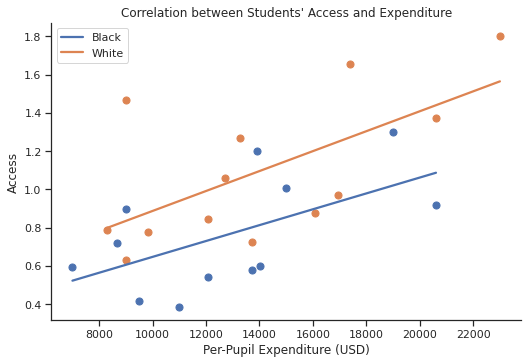

In [ ]:
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
plot_data = df.groupby(['state','state_color'])[['locale','pct_access','engagement_index','Expenditure']].mean().reset_index()

# Show the results of a linear regression within each dataset
sns.lmplot(data=plot_data[plot_data['pct_access'] < 2.5], x="Expenditure", y="pct_access", hue='state_color',
           ci=None, 
           height=5,
          aspect=1.5,

          legend=None,
          scatter_kws={"s": 50, "alpha": 1})
plt.legend(['Black','White'])
plt.title("Correlation between Students' Access and Expenditure")
plt.xlabel('Per-Pupil Expenditure (USD)')
plt.ylabel('Access')

# Visualization Part 3 - Vinh Anh

In [ ]:
#split primary function 
df['primary_function_main'] = df['primary_essential_function'].apply(lambda x: x.split(' - ')[0] if x == x else x)
df['primary_function_sub'] = df['primary_essential_function'].apply(lambda x: x.split(' - ')[1] if x == x else x)

#synchronize similar pattern
df['primary_function_sub'] = df['primary_function_sub'].replace({'Sites, Resources & References' : 'Sites, Resources & Reference'})

#define state color: high and mid is black/hyspanc state, low is more white/yellow state. 
def minor(row):
    if row == '[0, 0.2[':
        return 'White'
#    if row in ['[0.4, 0.6[', '[0.2, 0.4[']:
 #       return 'mid'
    else:
        return 'Black'
df['minor_level'] = df['pct_black/hispanic'].apply(minor)

#define covid_phase
df['calendar_week']= df['time'].dt.week 
def covidphase(row):
    if row < 10:
        return 0 # before
    elif 10 <= row <= 25:
        return 1 # hk1
    elif row > 35:
        return 2 # hk2
    else:
        return -1 # summer
df['Covid_phase']= df['calendar_week'].apply(covidphase)

def getexpenditure(row):
  if None or row == 'nan':
    return None
  else:
    return sum(list(map(int,(re.findall('\d+', str(row))))))/2
    
df['pp_total_raw'] = df.pp_total_raw.apply(getexpenditure)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


## Weekly Access comparison between Black and White

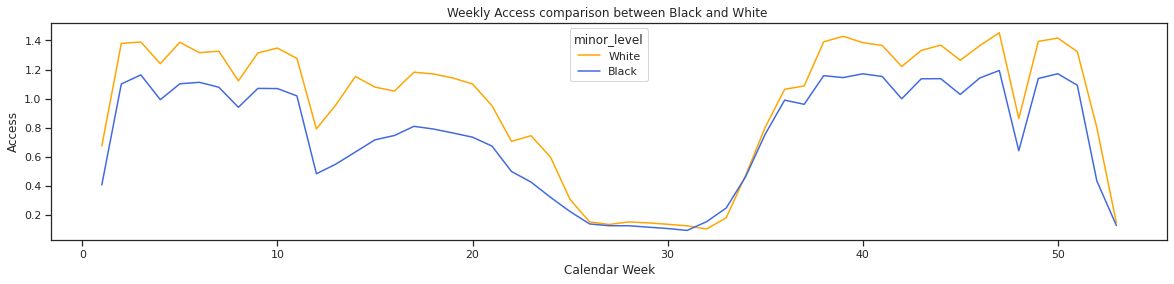

In [ ]:
#plot= df[df['state_color']== 'high'].groupby('product_name').mean().sort_values(by='engagement_index', ascending=False).reset_index().head(10)
plt.figure(figsize=(20,4))
a= sns.lineplot(data= df,
            x='calendar_week',
            y='pct_access',
            hue='minor_level',
            ci= None,
            palette= ['orange','royalblue'],
            hue_order= ['White', 'Black']
            )

a.set(xlabel='Calendar Week', ylabel='Access')
plt.title('Weekly Access comparison between Black and White ')

plt.show()

## Weekly Engagement index comparison between Black and White

In [ ]:
plt.figure(figsize=(20,4))
a= sns.lineplot(data= df,
            x='calendar_week',
            y='engagement_index',
            hue='minor_level',
            ci= None,
            palette= ['orange','royalblue'],
            hue_order= ['White', 'Black']
            )

a.set(xlabel='Calendar Week', ylabel='Engagement Index')
plt.title('Weekly Engagement index comparison between Black and White ')

plt.show()

## Weekly Access index comparison by Expenditure level

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


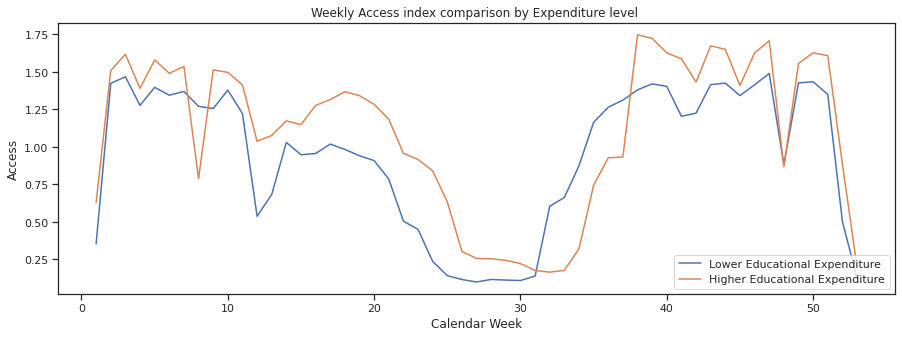

In [ ]:
df.loc[df['pp_total_raw'] <= 10000, 'Expenditure_level'] = 'Lower Educational Expenditure'
df.loc[df['pp_total_raw'] > 18000, 'Expenditure_level'] = 'Higher Educational Expenditure'
plot_data = df.groupby(['state','calendar_week'])['engagement_index','pct_access'].mean().reset_index()
plot_data = plot_data.merge(df[['state','Expenditure_level']].drop_duplicates(), on='state')

plt.figure(figsize=(15,5))
fig = sns.lineplot(
                    data=plot_data[plot_data.Expenditure_level != 'Average'],
                    x='calendar_week',
                    y='pct_access',
                    hue='Expenditure_level',
    #                 legend=False,
                    ci=None,
    #                 ax=axs[i]
                    )
#     fig.set_title(level)
#     fig.set_ylim([-0.01,100])
#     fig.set_xlim([-0.01,35])
fig.set(xlabel='Calendar Week', ylabel='Access')
plt.title('Weekly Access index comparison by Expenditure level ')
plt.legend(loc='lower right')
plt.show()

## Weekly Engagement index comparison by Expenditure level

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


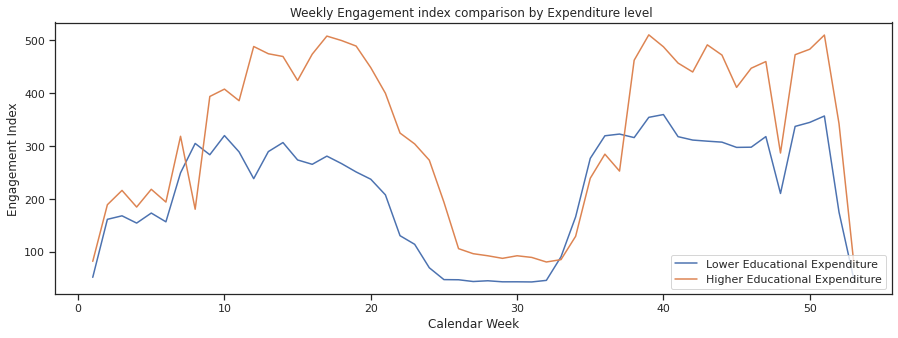

In [ ]:
plot_data = df.groupby(['state','calendar_week'])['engagement_index','pct_access'].mean().reset_index()
plot_data = plot_data.merge(df[['state','Expenditure_level']].drop_duplicates(), on='state')

plt.figure(figsize=(15,5))
fig = sns.lineplot(
                    data=plot_data[(plot_data.Expenditure_level != 'Average')&(plot_data.state != 'Arizona')],
                    x='calendar_week',
                    y='engagement_index',
                    hue='Expenditure_level',
    #                 legend=False,
                    ci=None,
    #                 ax=axs[i]
                    )
#     fig.set_title(level)
#     fig.set_ylim([-0.01,100])
#     fig.set_xlim([-0.01,35])
fig.set(xlabel='Calendar Week', ylabel='Engagement Index')

plt.title('Weekly Engagement index comparison by Expenditure level ')
plt.legend(loc='lower right')
plt.show()

## Weekly Access comparison by Economic condition

In [ ]:
df['pct_free/reduced'] = df['pct_free/reduced'].apply(getexpenditure)

In [ ]:
df.columns

Index(['time', 'lp_id', 'pct_access', 'engagement_index', 'district_id',
       'state', 'locale', 'pct_black/hispanic', 'pct_free/reduced',
       'county_connections_ratio', 'pp_total_raw', 'url', 'product_name',
       'provider/company_name', 'sector(s)', 'primary_essential_function',
       'week', 'Covid_phase', 'Expenditure', 'state_color', 'lunch',
       'primary_function_main', 'primary_function_sub', 'minor_level',
       'calendar_week'],
      dtype='object')

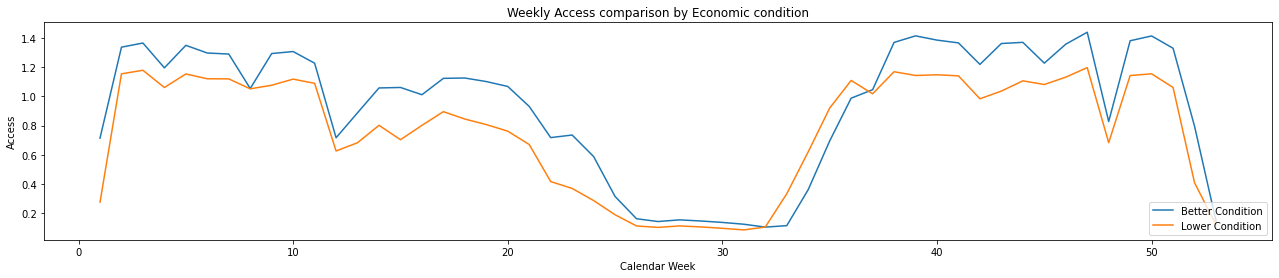

In [ ]:

df['Economic_condition'] = 'Average'
df.loc[df['pct_free/reduced'] <= 3, 'Economic_condition'] = 'Better Condition'
df.loc[df['pct_free/reduced'] > 3, 'Economic_condition'] = 'Lower Condition'
plt.figure(figsize=(22,4))
a=sns.lineplot(data= df[df['state']!= 'Arizona'],
            x='calendar_week',
            y='pct_access',
            hue='Economic_condition',
            ci= None
         
            )
plt.title('Weekly Access comparison by Economic condition')
plt.legend(loc='lower right')
a.set(xlabel='Calendar Week', ylabel='Access')

plt.show()

## Weekly Engagement Index comparison by Economic condition

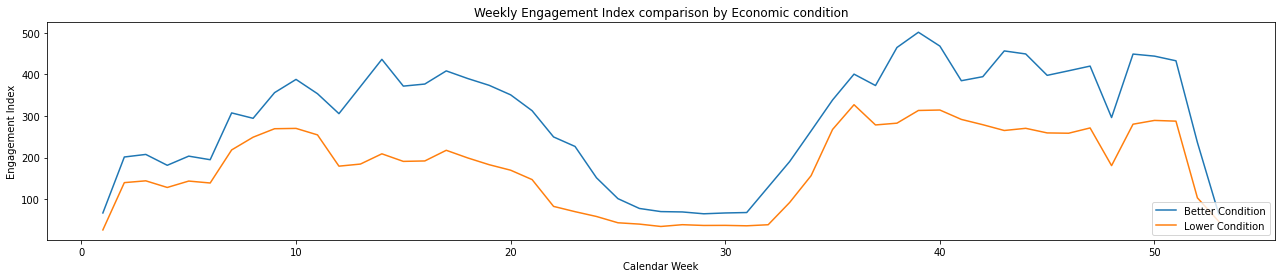

In [ ]:
plt.figure(figsize=(22,4))
a=sns.lineplot(data= df.groupby(['state','Economic_condition','calendar_week'])['engagement_index'].mean().reset_index(),
            x='calendar_week',
            y='engagement_index',
            hue='Economic_condition',
            ci= None,
            
            )
plt.title('Weekly Engagement Index comparison by Economic condition')
plt.legend(loc='lower right')
a.set(xlabel='Calendar Week', ylabel='Engagement Index')

plt.show()

## Weekly Engagement index by Locale

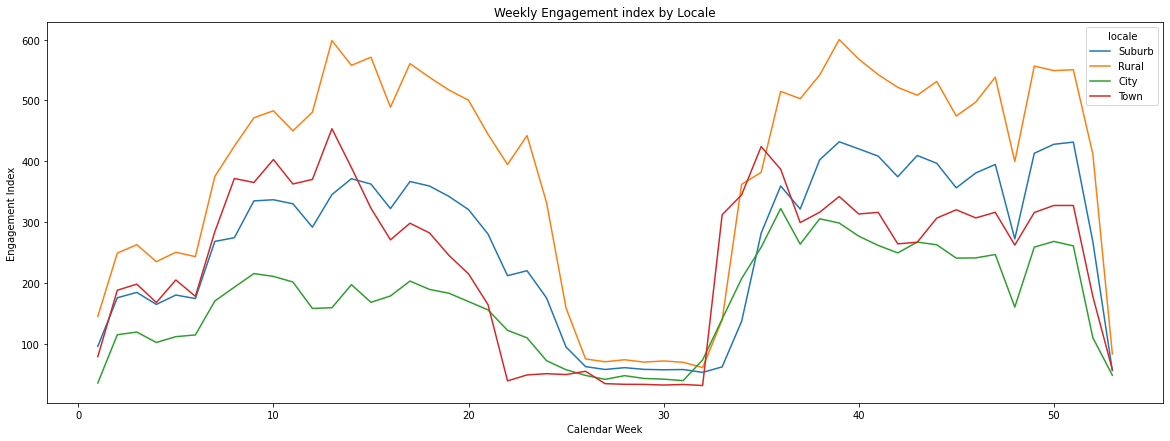

In [ ]:
#plot_data= df[df['state']!= 'Arizona']

plt.figure(figsize=(20,7))
a=sns.lineplot(data= df,
             x='calendar_week',
             y='engagement_index',
             hue='locale',
             ci= None)
a.set(xlabel='Calendar Week', ylabel='Engagement Index')
plt.title('Weekly Engagement index by Locale')
plt.show()

## Black and White distribution in urban context

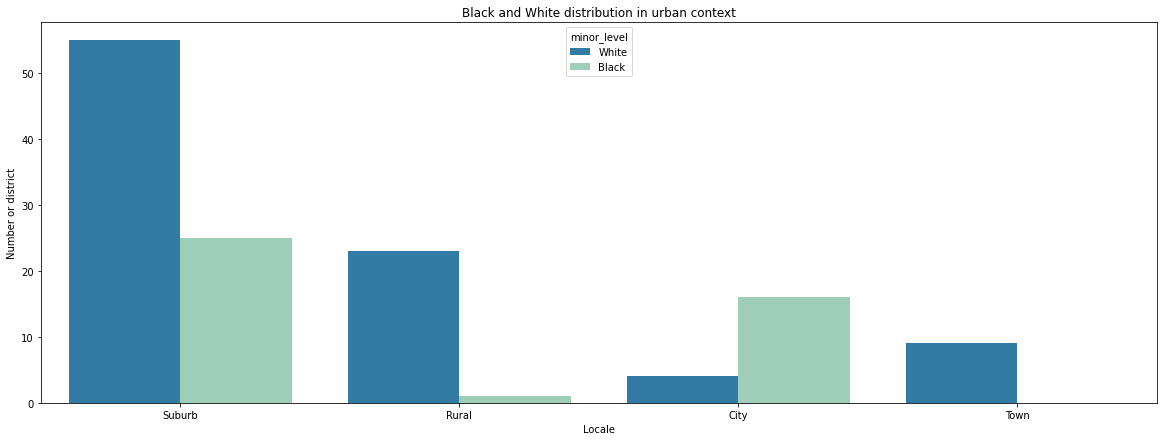

In [ ]:
plt.figure(figsize=(20,7))
a=sns.countplot(data= df[['district_id', 'locale', 'minor_level']].drop_duplicates(),
             x='locale',
             palette="YlGnBu_r",
             hue='minor_level'
             )
a.set(ylabel='Number or district', xlabel='Locale')
plt.title('Black and White distribution in urban context')
plt.show()

## Top 10 product used by White Students during 2020

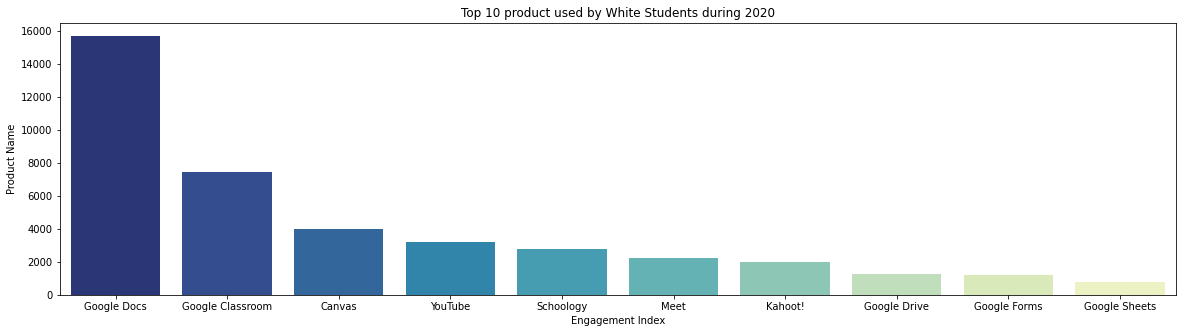

In [ ]:
plot= df[df['minor_level']== 'White'].groupby('product_name').mean().sort_values(by='engagement_index', ascending=False).reset_index().head(10)
plt.figure(figsize=(20,5))
a= sns.barplot(data= plot,
            x='product_name',
            y='engagement_index',
            palette='YlGnBu_r')
a.set(xlabel='Engagement Index', ylabel='Product Name')
plt.title('Top 10 product used by White Students during 2020')
plt.show()

## Top 10 product used by Black Students during 2020

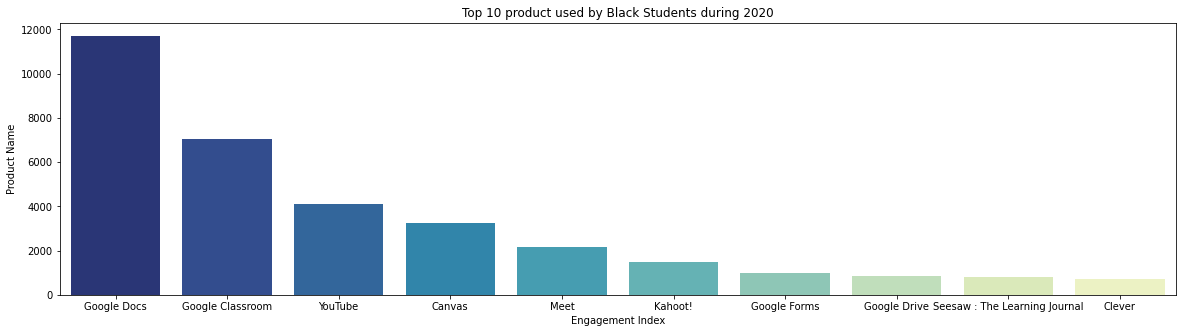

In [ ]:
plot= df[df['minor_level']== 'Black'].groupby('product_name').mean().sort_values(by='engagement_index', ascending=False).reset_index().head(10)
plt.figure(figsize=(20,5))
a=sns.barplot(data= plot,
            x='product_name',
          y='engagement_index',
            palette='YlGnBu_r')
a.set(xlabel='Engagement Index', ylabel='Product Name')
plt.title('Top 10 product used by Black Students during 2020')

plt.show()